In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load the dataset
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

# Separate features and target variable
X = train_data.drop(columns=['Id', 'SalePrice'])
y = train_data['SalePrice']

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessing for numerical data: impute missing values and scale
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data: impute missing values and one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Preprocess the data
X_processed = preprocessor.fit_transform(X)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Display shapes of the processed data
print(f'X_train shape: {X_train.shape}')
print(f'X_val shape: {X_val.shape}')


X_train shape: (1168, 287)
X_val shape: (292, 287)


In [5]:
# Import necessary libraries for building the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Build the feedforward neural network
model = Sequential()

# Input layer (input_dim should match the number of features after preprocessing)
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))

# Hidden layers (experiment with different numbers of layers and neurons)
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Output layer (single neuron for regression)
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')



Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 34295674880.0000 - val_loss: 32059432960.0000
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 29564467200.0000 - val_loss: 20967925760.0000
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 17153576960.0000 - val_loss: 8541886976.0000
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 6014223360.0000 - val_loss: 3141409536.0000
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2016466176.0000 - val_loss: 2495183872.0000
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1894281856.0000 - val_loss: 2176458752.0000
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2098960768.0000 - val_loss: 1969015936.0000
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1814246784.0000 - val_loss: 1831300736.0000
Epoch 9/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1257932672.0000 - val_loss: 1719420288.0000
Epoch 10/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1438649856.0000 - 

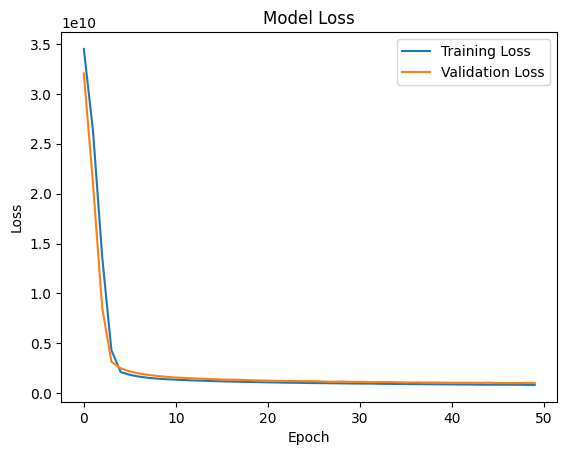

In [7]:
# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=50,            # Number of epochs
    batch_size=32,         # Batch size
    verbose=1              # Display training progress
)

# Plot training & validation loss values
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step
Mean Squared Error (MSE): 1022696871.1775824
Mean Absolute Error (MAE): 18532.06026594606
R-squared (R²): 0.8666683992892882


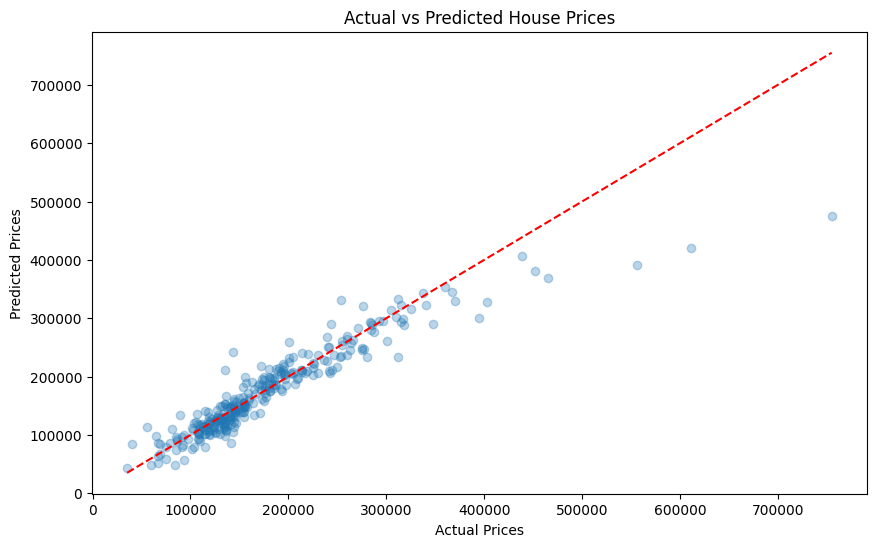

In [8]:
# Predict on the validation set
y_pred = model.predict(X_val)

# Evaluate the model using various metrics
mse = mean_squared_error(y_val, y_pred)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

# Visualize the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.3)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()


# **Report: Predicting House Prices Using a Feedforward Neural Network**
**1**. **Introduction**

**Objective**: To predict house prices based on various features using a feedforward neural network.
Dataset: "House Prices: Advanced Regression Techniques" from Kaggle.

**2**. **Methodology**

**Data Preparation**

Loading Data: Imported the dataset and separated features (X) from the target variable (y).

**Preprocessing Steps:**

Handling Missing Values: Imputed missing numerical values with the mean and categorical values with the most frequent value.
Encoding Categorical Variables: Applied one-hot encoding to convert categorical variables into numerical format.
Feature Scaling: Standardized numerical features to ensure consistent scale across all features.

**Model Architecture**

Feedforward Neural Network Design:
Input Layer: Matching the number of features after preprocessing.
Hidden Layers:
1st Hidden Layer: 128 neurons, ReLU activation
2nd Hidden Layer: 64 neurons, ReLU activation
3rd Hidden Layer: 32 neurons, ReLU activation
Output Layer: 1 neuron with a linear activation function for regression.
Optimizer: Adam with a learning rate of 0.001.
Loss Function: Mean Squared Error (MSE).

**3. Training**

Epochs: 50
Batch Size: 32
Training Process: The model was trained on the training set with validation on a separate validation set.

**4. Evaluation**

Metrics:
Mean Squared Error (MSE): 1022696871.1775824
Mean Absolute Error (MAE): 18532.06026594606
R-squared (R²): 0.8666683992892882

**Visualization:**

Loss Plot: Shows the training and validation loss over epochs.
Actual vs Predicted Prices: Scatter plot comparing actual house prices to predicted values.